# Q4.
##### USE MY BAYESIANNET TOOLBOX - Gibbs Sampling

In [1]:
%matplotlib inline

In [2]:
from bayesianNet import *

In [3]:
myModel = BayesianModel([('firstStep','secondStep'),('secondStep','thirdStep'),\
                             ('firstStep','sensor_s1'),('secondStep','sensor_s2'),('thirdStep','sensor_s3')])

myModel.add_cpd('firstStep',[[0.2],[0.8]])
myModel.add_cpd('secondStep',[[1, 0.2], [0, 0.8]],evidences=['firstStep'])
myModel.add_cpd('thirdStep',[[1, 0.2], [0, 0.8]],evidences=['secondStep'])
myModel.add_cpd('sensor_s1',[[1, 0.5], [0, 0.5]],evidences=['firstStep'])
myModel.add_cpd('sensor_s2',[[1, 0.5], [0, 0.5]],evidences=['secondStep'])
myModel.add_cpd('sensor_s3',[[1, 0.5], [0, 0.5]],evidences=['thirdStep'])

gibbs = GibbsSampler(myModel,step=30000)

tuner = GridSearchTuner(gibbs,burnInCoefficient=np.arange(0,0.3,0.003),thinningGap=np.arange(1,60))

ve = VE(myModel)

##### Query 1

In [4]:
### VE query
exactFactor = ve.query(['thirdStep'])

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.48799999999999993, (False,): 0.512}




The optimal hyper-parameters are:
{'burnInCoefficient': 0.28800000000000003, 'thinningGap': 57}, which indicates the first 8640 samples to be dropped, and count only every 57 samples.
The corresponding error is:
5.551115123125783e-17
            


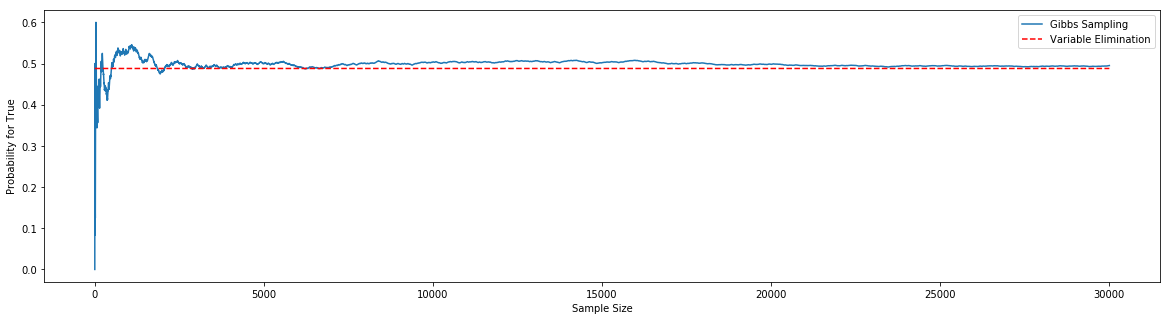

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.488, (False,): 0.512}



In [5]:
### Gibbs query with hyper-parameters tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,plotTrigger=True)

##### Query 2

In [6]:
### VE query
exactFactor = ve.query(['thirdStep'],evidences={'sensor_s2':True})

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.6235294117647058, (False,): 0.3764705882352941}




The optimal hyper-parameters are:
{'burnInCoefficient': 0.0090000000000000011, 'thinningGap': 25}, which indicates the first 270 samples to be dropped, and count only every 25 samples.
The corresponding error is:
1.1102230246251565e-16
            


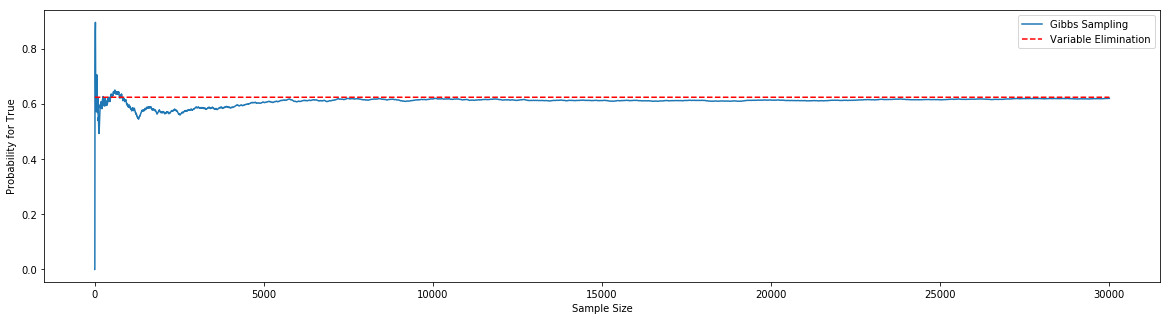

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.6235294117647059, (False,): 0.3764705882352941}



In [7]:
### Gibbs query with hyper-parameters tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,evidences={'sensor_s2':True},plotTrigger=True)

##### Query 3

In [8]:
### VE query
exactFactor = ve.query(['thirdStep'],evidences={'sensor_s1':True,'sensor_s2': False,'sensor_s3': True})

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.3333333333333333, (False,): 0.6666666666666666}




The optimal hyper-parameters are:
{'burnInCoefficient': 0.28500000000000003, 'thinningGap': 13}, which indicates the first 8550 samples to be dropped, and count only every 13 samples.
The corresponding error is:
0.0
            


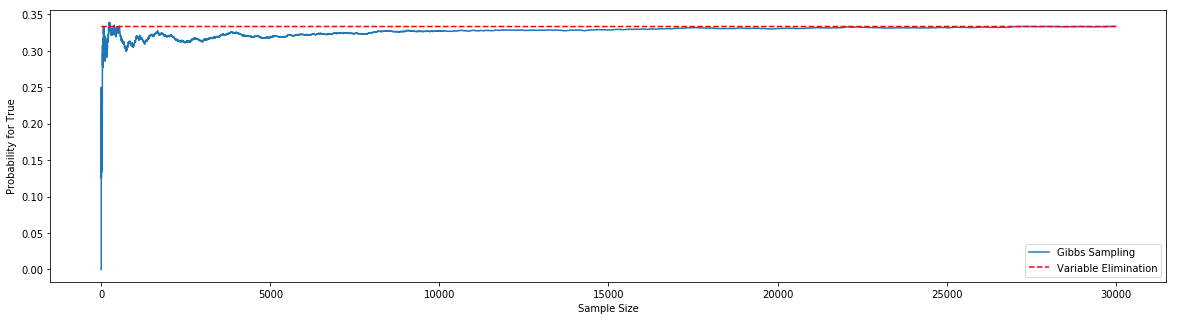

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.3333333333333333, (False,): 0.6666666666666666}



In [9]:
### Gibbs query with hyper-parameters tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,{'sensor_s1':True,'sensor_s2': False,'sensor_s3': True},\
                       plotTrigger=True)